In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
import pandas as pd

import plotly.express as px
from ipywidgets import interact
from ipywidgets import interactive
from ipywidgets import widgets
import sympy as smp
from scipy.integrate import odeint
import plotly.graph_objects as go
from IPython.display import HTML

# First order ODEs

$$ \dot{m_x} =\gamma(m_{y}H_{z}-m_{z}H_{y}) \hspace{10mm} m_x(0)=0$$
$$ \dot{m_y} =\gamma(m_{z}H_{x}-m_{x}H_{z}) \hspace{10mm} m_y(0)=0$$
$$ \dot{m_z} =\gamma(m_{x}H_{y}-m_{y}H_{x}) \hspace{10mm} m_z(0)=0$$

Letting $S=(m_x, m_y,m_x)$ we need to write a function that returns $dS/dt = (\dot{m}_{x}, \dot{m}_{y}, \dot{m}_{z})$. The function $dS/dt$ can take in $S=(m_x, m_y, m_z)$ and $t$. This is like before, but in vector format

$$ \vec{S} = \begin{bmatrix} m_x \\ m_y \\ m_z \end{bmatrix} \hspace{10mm} \implies  \hspace{10mm} \frac{d\vec{S}}{dt} = \vec{f}(t, \vec{S}) = \vec{f}(t, m_x, m_y, m_z) =  \begin{bmatrix}\dot{m_x} \\ \dot{m_y} \\ \dot{m_z} \end{bmatrix}  = \begin{bmatrix}  \gamma(m_{y}H_{z}-m_{z}H_{y})\\ \gamma(m_{z}H_{x}-m_{x}H_{z}) \\ \gamma(m_{x}H_{y}-m_{y}H_{x}) \end{bmatrix}$$

In [2]:
def dSdx(x, S):
    y1, y2 = S
    return [y1 + y2**2  + 3*x,
           3*y1 + y2**3 - np.cos(x)]
y1_0 = 0
y2_0 = 0
S_0 = (y1_0, y2_0)

In [3]:
H=[0,0,10]
Hx,Hy,Hz=H[0],H[1],H[2]

In [4]:
g=1
def dSdt(t, S):
    mx, my, mz = S
    return [g*(my*Hz-mz*Hy),g*(mz*Hx-mx*Hz),g*(mx*Hy-my*Hx)]
mx_0 = 0
my_0 = np.sin(np.pi/6)
mz_0 = np.cos(np.pi/6)
S_0 = (mx_0, my_0, mz_0)

In [5]:
t = np.linspace(0, 10, 1000)
sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)

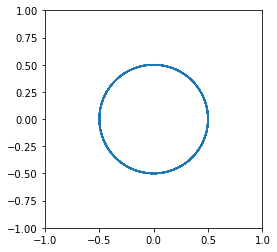

In [6]:
fig,ax=plt.subplots()
plt.plot(sol.T[0],sol.T[1])
ax.set_xlim(-1,1)
ax.set_ylim(-1,1)
ax.set_aspect("equal")


In [7]:
fig1 = go.FigureWidget()

#NEEL VECTOR
x = np.array([0,1])
y = np.array([0,0])
z = np.array([0,0])
fig1.add_scatter3d(x=x, y=y, z=z,
    marker=dict(size=0.1,color='black'),
    line=dict(color='black', width=4 ),
    name="Néel Vector")
fig1.add_cone(x=[x[1]], y=[y[1]], z=z[[1]], u=[x[1]+x[1]], v=[y[1]+y[1]], w=[z[1]+z[1]],showscale=False,anchor="tip",sizemode="absolute",
    sizeref=0.1,colorscale=[[0, '#000000'], [1,'#000000']])


fig1.update_layout(
    height=700,
    width=900,

    autosize=True,
    scene=dict(camera=dict(up=dict(x=0,y=0, z=1 ), eye=dict(x=-1,y=1,z=1,)),
               xaxis = dict(nticks=6, range=[-2,2]),
               yaxis = dict(nticks=6, range=[-2,2]),
               zaxis = dict(nticks=6, range=[-2,2]),
        aspectratio = dict( x=1, y=1, z=1),
        aspectmode = 'manual'))
#CIRCLE IN XY PLANE
C1=1.076
phi=np.linspace(0,2*np.pi,100)
x=C1*np.cos(phi)
y=C1*np.sin(phi)
z=C1*np.zeros(len(x))
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)
#CIRCLE IN XZ PLANE
phi=np.linspace(0,2*np.pi,100)
x=C1*np.cos(phi)
y=C1*np.zeros(len(x))
z=C1*np.sin(phi)
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)
x=sol.T[0]
y=sol.T[1]
z=sol.T[2]
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='red'),
    line=dict(color='red', width=2 ),
    showlegend=False)


Xs=sol.T[0]
Ys=sol.T[1]
Zs=sol.T[2]
def update(t=0):
    
    
    with fig1.batch_update():
        
        fig1.data[0].x=[0,Xs[t]]
        fig1.data[0].y=[0,Ys[t]]
        fig1.data[0].z=[0,Zs[t]]
        
        fig1.data[1].x=[Xs[t]]
        fig1.data[1].y=[Ys[t]]
        fig1.data[1].z=[Zs[t]]
        fig1.data[1].u=[2*Xs[t]]
        fig1.data[1].v=[2*Ys[t]]
        fig1.data[1].w=[2*Zs[t]]
        
w=interactive(update,t=(0,99,1)) 
w.children[0].description="$Time (t)$"

display(w)
fig1

interactive(children=(IntSlider(value=0, description='$Time (t)$', max=99), Output()), _dom_classes=('widget-i…

FigureWidget({
    'data': [{'line': {'color': 'black', 'width': 4},
              'marker': {'color': 'black'…

# First order ODEs

$$ \dot{m_x} =\gamma(m_{y}H_{z}-m_{z}H_{y})+\alpha(m_{y}\dot{m}_{z}-m_{z}\dot{m}_{y}) \hspace{10mm} m_x(0)=0$$
$$ \dot{m_y} =\gamma(m_{z}H_{x}-m_{x}H_{z})+\alpha(m_{z}\dot{m}_{x}-m_{x}\dot{m}_{z}) \hspace{10mm} m_y(0)=0$$
$$ \dot{m_z} =\gamma(m_{x}H_{y}-m_{y}H_{x})+\alpha(m_{x}\dot{m}_{y}-m_{y}\dot{m}_{x}) \hspace{10mm} m_z(0)=0$$

Letting $S=(m_x, m_y,m_x)$ we need to write a function that returns $dS/dt = (\dot{m}_{x}, \dot{m}_{y}, \dot{m}_{z})$. The function $dS/dt$ can take in $S=(m_x, m_y, m_z)$ and $t$. This is like before, but in vector format

$$ \vec{S} = \begin{bmatrix} m_x \\ m_y \\ m_z \end{bmatrix} \hspace{10mm} \implies  \hspace{10mm} \frac{d\vec{S}}{dt} = \vec{f}(t, \vec{S}) = \vec{f}(t, m_x, m_y, m_z) =  \begin{bmatrix}\dot{m_x} \\ \dot{m_y} \\ \dot{m_z} \end{bmatrix}  = \begin{bmatrix}  \gamma(m_{y}H_{z}-m_{z}H_{y})\\ \gamma(m_{z}H_{x}-m_{x}H_{z}) \\ \gamma(m_{x}H_{y}-m_{y}H_{x}) \end{bmatrix}$$

In [8]:
g=-1
a=0.1

H=[0,0,1]
Hx,Hy,Hz=H[0],H[1],H[2]
def dSdt2(t, S):
    mx, my, mz = S
    return [g*(-Hx*a*my*my-Hx*a*mz*mz+Hy*a*mx*my-Hy*mz+Hz*a*mx*mz+Hz*my)/(a**2*(mx**2+my**2+mz**2)+1),
            g*(+Hx*a*mx*my+Hx*mz-Hy*a*mx*mx-Hy*a*mz*mz+Hz*a*my*mz-Hz*mx)/(a**2*(mx**2+my**2+mz**2)+1),
            g*(+Hx*a*mx*mz-Hx*my+Hy*a*my*mz+Hy*mx-Hz*a*mx*mx-Hz*a*my*my)/(a**2*(mx**2+my**2+mz**2)+1)]

theta=179*np.pi/180   
mx_0 = 0
my_0 = np.sin(theta)
mz_0 = np.cos(theta)
S_0 = (mx_0, my_0, mz_0)

In [9]:
t = np.linspace(0, 100, 1000)
sol = odeint(dSdt2, y0=S_0, t=t, tfirst=True)

In [10]:
fig1 = go.FigureWidget()



#NEEL VECTOR
x = np.array([0,1])
y = np.array([0,0])
z = np.array([0,0])
fig1.add_scatter3d(x=x, y=y, z=z,
    marker=dict(size=0.1,color='black'),
    line=dict(color='black', width=4 ),
    name="Néel Vector",showlegend=False)
fig1.add_cone(x=[x[1]], y=[y[1]], z=z[[1]], u=[x[1]+x[1]], v=[y[1]+y[1]], w=[z[1]+z[1]],showscale=False,anchor="tip",sizemode="absolute",
    sizeref=0.1,colorscale=[[0, '#000000'], [1,'#000000']])


fig1.update_layout(
    height=700,
    width=900,

    autosize=True,
    scene=dict(camera=dict(up=dict(x=0,y=0, z=1 ), eye=dict(x=-1,y=1,z=1,)),
               xaxis = dict(nticks=6, range=[-2,2]),
               yaxis = dict(nticks=6, range=[-2,2]),
               zaxis = dict(nticks=6, range=[-2,2]),
        aspectratio = dict( x=1, y=1, z=1),
        aspectmode = 'manual'))
#CIRCLE IN XY PLANE
C1=1
phi=np.linspace(0,2*np.pi,100)
x=C1*np.cos(phi)
y=C1*np.sin(phi)
z=C1*np.zeros(len(x))
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)
#CIRCLE IN XZ PLANE
phi=np.linspace(0,2*np.pi,100)
x=C1*np.cos(phi)
y=C1*np.zeros(len(x))
z=C1*np.sin(phi)
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)

#CIRCLE IN YZ PLANE
phi=np.linspace(0,2*np.pi,100)
x=C1*np.zeros(len(x))
y=C1*np.cos(phi)
z=C1*np.sin(phi)
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)

#CIRCLE IN YZ PLANE
phi=np.linspace(-1,1,100)
x=C1*np.zeros(len(x))
y=C1*np.zeros(len(x))
z=phi
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)
#CIRCLE IN YZ PLANE
phi=np.linspace(-1,1,100)
x=C1*np.zeros(len(x))
y=phi
z=C1*np.zeros(len(x))
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)
#CIRCLE IN YZ PLANE
phi=np.linspace(-1,1,100)
x=phi
y=C1*np.zeros(len(x))
z=C1*np.zeros(len(x))
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)

x=sol.T[0]
y=sol.T[1]
z=sol.T[2]


fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.5,
    marker=dict(size=1),
    line=dict(color='red', width=1 ),
    showlegend=False)

#x = np.array([0,0.2])
#y = np.array([0,0])
#z = np.array([0,0])
#fig1.add_scatter3d(x=x, y=y, z=z,
#    marker=dict(size=0.1,color='blue'),
#    line=dict(color='blue', width=1 ))
#fig1.add_cone(x=[x[1]], y=[y[1]], z=z[[1]], u=[x[1]+x[1]], v=[y[1]+y[1]], w=[z[1]+z[1]],showscale=False,anchor="tip",sizemode="absolute",
#    sizeref=0.05,colorscale=[[0, '#000000'], [1,'#000000']])

theta, phi = np.mgrid[0:2*np.pi:100j, 0:2*np.pi:100j]
x = np.sin(theta)*np.sin(phi)
y = np.sin(theta)*np.cos(phi)
z = np.cos(theta)

fig1.add_surface(x=x,y=y,z=z,opacity=0.05,colorscale=[[0, 'yellow'], [1,'purple']],showlegend=False, showscale = False)

Xs=sol.T[0]
Ys=sol.T[1]
Zs=sol.T[2]
def update(t=0):
    
    with fig1.batch_update():
        
        fig1.data[0].x=[0,Xs[t]]
        fig1.data[0].y=[0,Ys[t]]
        fig1.data[0].z=[0,Zs[t]]
        
        fig1.data[1].x=[Xs[t]]
        fig1.data[1].y=[Ys[t]]
        fig1.data[1].z=[Zs[t]]
        fig1.data[1].u=[2*Xs[t]]
        fig1.data[1].v=[2*Ys[t]]
        fig1.data[1].w=[2*Zs[t]]
        
w=interactive(update,t=(0,999,1)) 
w.children[0].description="$Time (t)$"

display(w)
fig1

interactive(children=(IntSlider(value=0, description='$Time (t)$', max=999), Output()), _dom_classes=('widget-…

FigureWidget({
    'data': [{'line': {'color': 'black', 'width': 4},
              'marker': {'color': 'black'…

In [11]:
fig1 = go.FigureWidget(
    frames=[go.Frame(
        data=[go.Scatter(
            x=[xx[k]],
            y=[yy[k]],
            mode="markers",
            marker=dict(color="red", size=10))])

        for k in range(999)])



#NEEL VECTOR
x = np.array([0,1])
y = np.array([0,0])
z = np.array([0,0])
fig1.add_scatter3d(x=x, y=y, z=z,
    marker=dict(size=0.1,color='black'),
    line=dict(color='black', width=4 ),
    name="Néel Vector",showlegend=False)
fig1.add_cone(x=[x[1]], y=[y[1]], z=z[[1]], u=[x[1]+x[1]], v=[y[1]+y[1]], w=[z[1]+z[1]],showscale=False,anchor="tip",sizemode="absolute",
    sizeref=0.1,colorscale=[[0, '#000000'], [1,'#000000']])


fig1.update_layout(
    height=700,
    width=900,

    autosize=True,
    scene=dict(camera=dict(up=dict(x=0,y=0, z=1 ), eye=dict(x=-1,y=1,z=1,)),
               xaxis = dict(nticks=6, range=[-2,2]),
               yaxis = dict(nticks=6, range=[-2,2]),
               zaxis = dict(nticks=6, range=[-2,2]),
        aspectratio = dict( x=1, y=1, z=1),
        aspectmode = 'manual'))
#CIRCLE IN XY PLANE
C1=1
phi=np.linspace(0,2*np.pi,100)
x=C1*np.cos(phi)
y=C1*np.sin(phi)
z=C1*np.zeros(len(x))
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)
#CIRCLE IN XZ PLANE
phi=np.linspace(0,2*np.pi,100)
x=C1*np.cos(phi)
y=C1*np.zeros(len(x))
z=C1*np.sin(phi)
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)

#CIRCLE IN YZ PLANE
phi=np.linspace(0,2*np.pi,100)
x=C1*np.zeros(len(x))
y=C1*np.cos(phi)
z=C1*np.sin(phi)
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)

#CIRCLE IN YZ PLANE
phi=np.linspace(-1,1,100)
x=C1*np.zeros(len(x))
y=C1*np.zeros(len(x))
z=phi
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)
#CIRCLE IN YZ PLANE
phi=np.linspace(-1,1,100)
x=C1*np.zeros(len(x))
y=phi
z=C1*np.zeros(len(x))
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)
#CIRCLE IN YZ PLANE
phi=np.linspace(-1,1,100)
x=phi
y=C1*np.zeros(len(x))
z=C1*np.zeros(len(x))
fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.3,
    marker=dict(size=0.1,color='grey'),
    line=dict(color='grey', width=2 ),
    showlegend=False)

x=sol.T[0]
y=sol.T[1]
z=sol.T[2]


fig1.add_scatter3d(x=x, y=y, z=z,opacity=0.5,
    marker=dict(size=1),
    line=dict(color='red', width=1 ),
    showlegend=False)

#x = np.array([0,0.2])
#y = np.array([0,0])
#z = np.array([0,0])
#fig1.add_scatter3d(x=x, y=y, z=z,
#    marker=dict(size=0.1,color='blue'),
#    line=dict(color='blue', width=1 ))
#fig1.add_cone(x=[x[1]], y=[y[1]], z=z[[1]], u=[x[1]+x[1]], v=[y[1]+y[1]], w=[z[1]+z[1]],showscale=False,anchor="tip",sizemode="absolute",
#    sizeref=0.05,colorscale=[[0, '#000000'], [1,'#000000']])

theta, phi = np.mgrid[0:2*np.pi:100j, 0:2*np.pi:100j]
x = np.sin(theta)*np.sin(phi)
y = np.sin(theta)*np.cos(phi)
z = np.cos(theta)

fig1.add_surface(x=x,y=y,z=z,opacity=0.05,colorscale=[[0, 'yellow'], [1,'purple']],showlegend=False, showscale = False)

Xs=sol.T[0]
Ys=sol.T[1]
Zs=sol.T[2]





fig1

NameError: name 'xx' is not defined

# Symbolic attempt

In [ ]:
t = smp.symbols('t', real=True)
Hx, Hy, Hz, a, g = smp.symbols('Hx Hy Hz a g', real=True)
mx, my, mz = smp.symbols(r'm_{x} m_{y} m_{z}', cls=smp.Function)
mx = mx(t)
my = my(t)
mz = mz(t)
# Derivatives
mx_d = smp.diff(mx,t)
my_d = smp.diff(my,t)
mz_d = smp.diff(mz,t)

In [ ]:
mx, my, mz

In [ ]:
mx_d, my_d, mz_d

In [ ]:
a=1

# First order ODEs

$$ \dot{m_x} =\gamma(m_{y}H_{z}-m_{z}H_{y})+\alpha(m_{y}\dot{m}_{z}-m_{z}\dot{m}_{y}) \hspace{10mm} m_x(0)=0$$
$$ \dot{m_y} =\gamma(m_{z}H_{x}-m_{x}H_{z})+\alpha(m_{z}\dot{m}_{x}-m_{x}\dot{m}_{z}) \hspace{10mm} m_y(0)=0$$
$$ \dot{m_z} =\gamma(m_{x}H_{y}-m_{y}H_{x})+\alpha(m_{x}\dot{m}_{y}-m_{y}\dot{m}_{x}) \hspace{10mm} m_z(0)=0$$

Letting $S=(m_x, m_y,m_x)$ we need to write a function that returns $dS/dt = (\dot{m}_{x}, \dot{m}_{y}, \dot{m}_{z})$. The function $dS/dt$ can take in $S=(m_x, m_y, m_z)$ and $t$. This is like before, but in vector format

$$ \vec{S} = \begin{bmatrix} m_x \\ m_y \\ m_z \end{bmatrix} \hspace{10mm} \implies  \hspace{10mm} \frac{d\vec{S}}{dt} = \vec{f}(t, \vec{S}) = \vec{f}(t, m_x, m_y, m_z) =  \begin{bmatrix}\dot{m_x} \\ \dot{m_y} \\ \dot{m_z} \end{bmatrix}  = \begin{bmatrix}  \gamma(m_{y}H_{z}-m_{z}H_{y})\\ \gamma(m_{z}H_{x}-m_{x}H_{z}) \\ \gamma(m_{x}H_{y}-m_{y}H_{x}) \end{bmatrix}$$

In [ ]:
E1=-mx_d+g*(my*Hz-mz*Hy)+a*(my*mz_d-mz*my_d)
E2=-my_d+g*(mz*Hx-mx*Hz)+a*(mz*mx_d-mx*mz_d)
E3=-mz_d+g*(mx*Hy-my*Hx)+a*(mx*my_d-my*mx_d)

In [ ]:
E1,E2,E3

In [ ]:
sols = smp.solve([E1, E2, E3], (mx_d, my_d, mz_d),
                simplify=True, rational=False)

In [ ]:
sols

In [ ]:
sols[mx_d]

In [ ]:
sols[my_d]

In [ ]:
sols[mz_d]

In [ ]:
E3

In [ ]:
E1